##### Project ini belum sepenuhnya selesai dikarenakan info mendadak terkait perubahan schedule upload file. Masih dalam tahap hyper tunning. Oleh karena itu kesimpulan yang dibuat dalam file ini masih bersifat sementara.

Framework - FinalProject
1. Define Problem
2. Define Goals
3. Data Colletion
4. Cek Missing Value
5. Describe Data
6. EDA -- Handling Missing Value
7. Feature Engineering -- Handling Outliers
8. Export file finalProject Fix
9. Handling Imbalance Data
--------------------------------------------
10. Train with Base Algorithm
11. Train with Complex Algorithm
12. Train Base with Hyper param
13. Train Complex with Hyper param
--------------------------------------------
14. Classification Report
15. Confusion Matrix
16. Evaluation Model (Score Dibuat DataFrame)
--------------------------------------------
17. Memilih Model
18. Export Model
19. Dashboard (Joblib/Pickle)

## ----------------------------- *Udemy_Course (Online Course Bussines)* -----------------------------

------------------------------------------------------------------------------------------------------------------------------------------------------

# Referensi

1. https://mediaindonesia.com/read/detail/321039-dampak-pandemi-kualitas-pendidikan-alami-penurunan
2. https://suteki.co.id/7-dampak-positif-pandemi-covid-19-bagi-dunia-pendidikan/
3. https://www.sonora.id/read/422146758/dampak-pandemi-covid-19-jumlah-siswa-bimbel-turun-signifikan?page=all

# (1-2) Definition, Problems, and Goals

------------------------------------------------------------------------------------------------------------------------------------------------------

### Definition

Machine Learning ini merupakan salah satu model untuk menentukan sukses tidak nya suatu course yang akan dibuka oleh suatu Lembaga Pendidikan atau dalam problem ini ialah MOOC, yang dapat digunakan oleh perusahaan atau lembaga tersebut sebagai bahan pertimbangan dalam me-*release* course baru.

### Problems & Goals

2.1 Problems
- Kualitas Pendidikan Menurun saat diterapkannya Sistem Pendidikan Jarak Jauh berbasis Teknologi (mediaindonesia.com)
- Penurunan partisipan pada Lembaga-lembaga Bimbingan Belajar akibat Covid-19 (sonora.id)
- Kesulitan dalam mencari pekerjaan akibat pandemi covid, sehingga memiliki skill-skill yang bagus dapat menjadi nilai jual utama. Sehingga course2 dari lembaga-lembaga pendidikan non-formal akan banyak dicari
- Kesulitan untuk mengetahui course apa yang paling dibutuhkan mereka-mereka yang sedang ingin improving skill bagi Lembaga-lembaga MOOC

2.2 Goals
- Membuat model yang dapat memprediksi/mendeteksi sukses tidaknya suatu course yang akan dibuka oleh suatu MOOC dalam mendapatkan subscribers atau partisipan
- Mengetahui variabel apa saja yang dapat mempengaruhi sukses/tidaknya suatu course dalam mendapatkan subscribers atau partisipan

2.3 Limitasi
- Model dapat digunakan oleh seluruh perusahaan berbasis Platform Media Pembelajaran Online / MOOC / Bimbel dan perusahaan sejenis lainnya.
- Model hanya dapat memprediksi dan atau mengklasifikasikan sukses atau tidaknya course yang akan dibuka.


# Import Package

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import joblib
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns=999
pd.set_option('display.max_colwidth', -1)

%matplotlib inline

from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso, Ridge, ElasticNet
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from xgboost import XGBClassifier, XGBRegressor
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, RandomForestRegressor 
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import PolynomialFeatures, RobustScaler, MinMaxScaler,power_transform, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample
from sklearn.decomposition import PCA
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import classification_report, confusion_matrix, log_loss, roc_auc_score, roc_curve, auc
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from statsmodels.api import OLS

------------------------------------------------------------------------------------------------------------------------------------------------------

# (3) Import Data

------------------------------------------------------------------------------------------------------------------------------------------------------

In [2]:
df = pd.read_csv('udemy.csv', parse_dates=['published_timestamp'])
df1 = df.copy()
df1['content_duration'] = round(df1['content_duration'],2)

In [3]:
df1.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-banking-course/,True,200,2147,23,51,All Levels,1.5,2017-01-18 20:58:58+00:00,Business Finance
1,1113822,Complete GST Course & Certification - Grow Your CA Practice,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09 16:34:20+00:00,Business Finance
2,1006314,Financial Modeling for Business Analysts and Consultants,https://www.udemy.com/financial-modeling-for-business-analysts-and-consultants/,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19 19:26:30+00:00,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel 2017,https://www.udemy.com/complete-excel-finance-course-from-beginner-to-pro/,True,95,2451,11,36,All Levels,3.0,2017-05-30 20:07:24+00:00,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-profits-trading-options/,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13 14:57:18+00:00,Business Finance


------------------------------------------------------------------------------------------------------------------------------------------------------

# (4) Cek Missing Value

------------------------------------------------------------------------------------------------------------------------------------------------------

In [4]:
df1.isna().sum()

course_id              0
course_title           0
url                    0
is_paid                0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
content_duration       0
published_timestamp    0
subject                0
dtype: int64

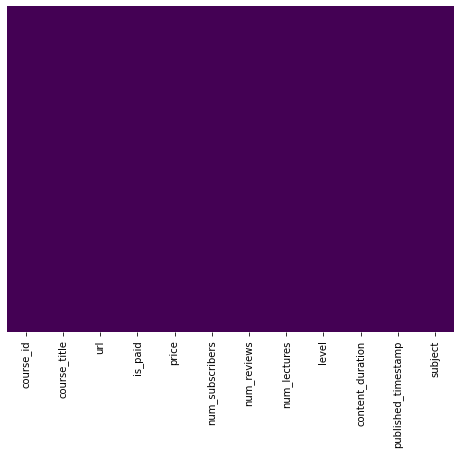

In [5]:
plt.figure(figsize=(8,6))
sns.heatmap(df1.isna(), cmap='viridis', yticklabels=False, cbar=False)
plt.show()

- **Tidak terdapat null, sehingga Handling Missing Value tidak perlu dilakukan**

------------------------------------------------------------------------------------------------------------------------------------------------------

# (5) Describe Data

------------------------------------------------------------------------------------------------------------------------------------------------------

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   course_id            3678 non-null   int64              
 1   course_title         3678 non-null   object             
 2   url                  3678 non-null   object             
 3   is_paid              3678 non-null   bool               
 4   price                3678 non-null   int64              
 5   num_subscribers      3678 non-null   int64              
 6   num_reviews          3678 non-null   int64              
 7   num_lectures         3678 non-null   int64              
 8   level                3678 non-null   object             
 9   content_duration     3678 non-null   float64            
 10  published_timestamp  3678 non-null   datetime64[ns, UTC]
 11  subject              3678 non-null   object             
dtypes: bool(1), datetime

In [7]:
df1.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject'],
      dtype='object')

### Variabel

- course_id: ID setiap jenis course
- course_title: Nama Course
- url: url dari course_title
- is paid: Tipe Course (Gratis / Berbayar)
- price: Harga course (dalam satuan USD)
- num_subscriber: Jumlah subscriber atau student
- num_reviews: Jumlah subscriber atau partisipan yang memberikan review
- num_lectures: Jumlah instruktur
- level: Level course 
- content_duration: Durasi konten dari satu course nya (dalam satuan hours)
- published_timestamp: Keterangan waktu perilisan course
- subject: Kategori course

In [8]:
df1.subject.unique()

array(['Business Finance', 'Graphic Design', 'Musical Instruments',
       'Web Development'], dtype=object)

In [9]:
df1.level.unique()

array(['All Levels', 'Intermediate Level', 'Beginner Level',
       'Expert Level'], dtype=object)

In [10]:
tab_desc1 = df1.describe().T
tab_desc1

,count,mean,std,min,25%,50%,75%,max
course_id,3678.0,675971.963295,343273.156040,8324.0,407692.5,687917.0,961355.50,1282064.0
price,3678.0,66.049483,61.005755,0.0,20.0,45.0,95.00,200.0
num_subscribers,3678.0,3197.150625,9504.117010,0.0,111.0,911.5,2546.00,268923.0
num_reviews,3678.0,156.259108,935.452044,0.0,4.0,18.0,67.00,27445.0
num_lectures,3678.0,40.108755,50.383346,0.0,15.0,25.0,45.75,779.0
content_duration,3678.0,4.094527,6.053835,0.0,1.0,2.0,4.50,78.5


In [11]:
tab_desc2 = df1.describe(include='O').T
tab_desc2

,count,unique,top,freq
course_title,3678,3663,Creating an animated greeting card via Google Slides,3
url,3678,3672,https://www.udemy.com/build-beautiful-html5-website/,2
level,3678,4,All Levels,1929
subject,3678,4,Web Development,1200


In [12]:
dfDesc = []
for i in df1.columns:
    dfDesc.append([
        i,
        df1[i].dtypes,
        df1[i].isna().sum(),
        round((df1[i].isna().sum()/len(df1)*100),2),
        df1[i].nunique(),
        df1[i].drop_duplicates().sample(2).values
    ])

In [13]:
tab_desc3 = pd.DataFrame(dfDesc, columns=['Feature','dtypes','null','null%','nunique','sample'])
tab_desc3

,Feature,dtypes,null,null%,nunique,sample
0,course_id,int64,0,0.0,3672,"[205764, 963664]"
1,course_title,object,0,0.0,3663,"[Learn How To Play 25 Classic Hip Hop Songs Ch.2, Instant Harmonica - play Summertime + Drunken Sailor now!]"
2,url,object,0,0.0,3672,"[https://www.udemy.com/turn-your-photos-into-professional-and-modern-artworks/, https://www.udemy.com/asp-basics-for-beginners/]"
3,is_paid,bool,0,0.0,2,"[True, False]"
4,price,int64,0,0.0,38,"[70, 145]"
5,num_subscribers,int64,0,0.0,2197,"[22257, 850]"
6,num_reviews,int64,0,0.0,511,"[82, 205]"
7,num_lectures,int64,0,0.0,229,"[118, 274]"
8,level,object,0,0.0,4,"[Beginner Level, Expert Level]"
9,content_duration,float64,0,0.0,105,"[0.7, 22.5]"


- Course ID dan Course title tidak sama jumlah nunique nya. Kemungkinan ada beberapa course title yang terduplikasi
- Selain itu, jumlah data ialah 3678, sedangkan course_id hanya 3672. **Ada sejumlah 6 data memiliki course_id yang sama**

In [14]:
id_duplikat = df1.course_id.value_counts().head(6).index
index_loc = []
for i in id_duplikat:
    index_loc.append([
        i,
        df1.index[df1.course_id==i]
    ])

In [15]:
tab_desc4 = pd.DataFrame(index_loc, columns=['course_id', 'loc_index'])
tab_desc4

,course_id,loc_index
0,185526,"Int64Index([1234, 1473], dtype='int64')"
1,1084454,"Int64Index([463, 1100], dtype='int64')"
2,837322,"Int64Index([453, 787], dtype='int64')"
3,28295,"Int64Index([2478, 2561], dtype='int64')"
4,1035638,"Int64Index([778, 894], dtype='int64')"
5,1157298,"Int64Index([454, 788], dtype='int64')"


- Setiap course yang sama tersebut akan didrop salah satunya

In [16]:
tab_desc5 = df1[(df1.course_id==185526) | (df1.course_id==1084454)]
tab_desc5

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
463,1084454,CFA Level 2- Quantitative Methods,https://www.udemy.com/cfa-level-2-quantitative-methods/,True,40,0,0,35,All Levels,5.50,2017-07-02 14:29:35+00:00,Business Finance
1100,1084454,CFA Level 2- Quantitative Methods,https://www.udemy.com/cfa-level-2-quantitative-methods/,True,40,0,0,35,All Levels,5.50,2017-07-02 14:29:35+00:00,Business Finance
1234,185526,MicroStation - Células,https://www.udemy.com/microstation-celulas/,True,20,0,0,9,Beginner Level,0.62,2014-04-15 21:48:55+00:00,Graphic Design
1473,185526,MicroStation - Células,https://www.udemy.com/microstation-celulas/,True,20,0,0,9,Beginner Level,0.62,2014-04-15 21:48:55+00:00,Graphic Design


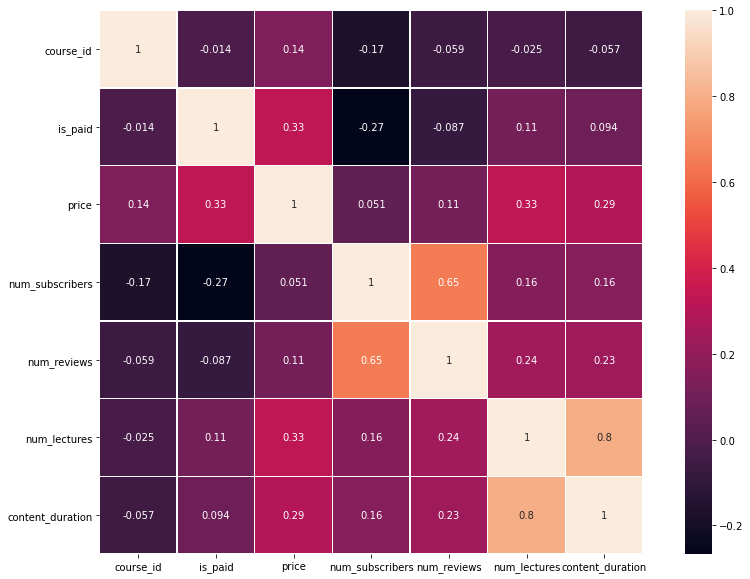

In [17]:
plt.figure(figsize=(15, 10))

sns.heatmap(df1.corr(), annot=True, square=True, linewidths=0.25)
plt.show()

- Hipotesis awal variabel yang berhubungan dengan **Jumlah Subscribers** berdasarkan nilai korelasi tertinggi

1. Jumlah Reviews
2. Paid or not
3. Content duration
4. Jumlah Lectures

------------------------------------------------------------------------------------------------------------------------------------------------------

# (6) EDA without Handling Missing Value

------------------------------------------------------------------------------------------------------------------------------------------------------

## a. Analisa 1 variabel (Persebaran Data)

In [18]:
feature_num = df1[['num_subscribers', 'num_reviews', 'num_lectures', 'content_duration', 'price', 'subject', 'level']]
for i in feature_num:
    if feature_num[i].dtype in ['object','bool']:
        pass
    elif i == 'price':
        pass
    else:
        feature_num[i +'_log'] = np.log(feature_num[i] + 1)
log_feature = [f for f in feature_num.columns if '_log' in f]

##### a1. Subscribers

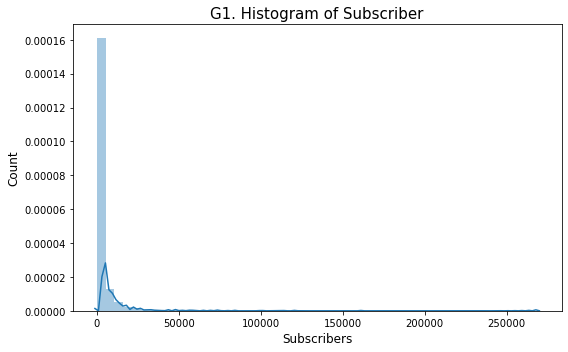

In [19]:
plt.figure(figsize=(8,5))
sns.distplot(df1.num_subscribers, bins=50)
plt.title('G1. Histogram of Subscriber', fontsize=15)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Subscribers', fontsize=12)  
plt.tick_params(labelsize=10) # ukuran xticks & yticks
plt.tight_layout()
# plt.savefig('hist-1.png')
plt.show()

- Berdasarkan Grafik G1, bentuk histogram jumlah subscriber merupakan skewness positif, **Jumlah persebaran data subscriber sebagian besar pada jumlah 0 sampai ± 10000**

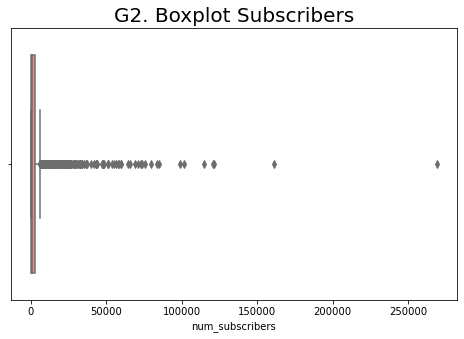

In [20]:
plt.figure(figsize=(8,5))
sns.boxplot(df1.num_subscribers, color='salmon')
plt.title('G2. Boxplot Subscribers', fontsize=20)
plt.show()

In [21]:
uf_subs = (1.5*(df1.num_subscribers.quantile(0.75)-df1.num_subscribers.quantile(0.25))) + df1.num_subscribers.quantile(0.75)
b=df1.num_subscribers[df1.num_subscribers<=uf_subs]

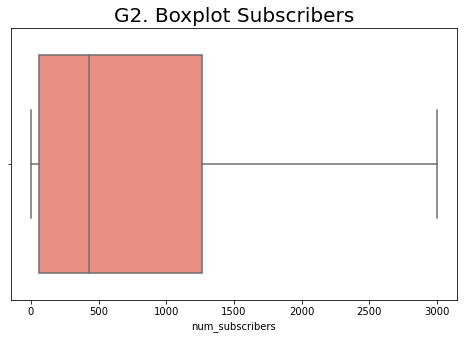

In [22]:
plt.figure(figsize=(8,5))
sns.boxplot(df1.num_subscribers[df1.num_subscribers<=3000], color='salmon')
plt.title('G2. Boxplot Subscribers', fontsize=20)
plt.show()

In [23]:
df1.num_subscribers[df1.num_subscribers<=3000].count()

2870

- Berdasarkan grafik G2, **Terdapat 433 Outlier dari 3672 data**.  
- Upper Fence Jumlah Subscribers adalah 6198.5

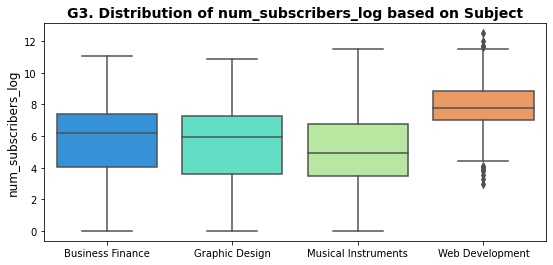

In [24]:
plt.figure(figsize=(9,4))
ax = sns.boxplot(x='subject', y='num_subscribers_log', data=feature_num, palette='rainbow')
ax.set_xlabel('', fontsize=12)
ax.set_ylabel('num_subscribers_log', fontsize=12)
ax.set_title('G3. Distribution of num_subscribers_log based on Subject', fontsize=14, weight='bold')
plt.show()

- Skewness negatif jika Q1-Q2 lebih banyak
- Whisker = daerah Q3 - Upper Fence ()
- Jadi median boxplot artinya frekuensi num_subscribers_log untuk course di subject tsb banyak di subscribers_log value y nya

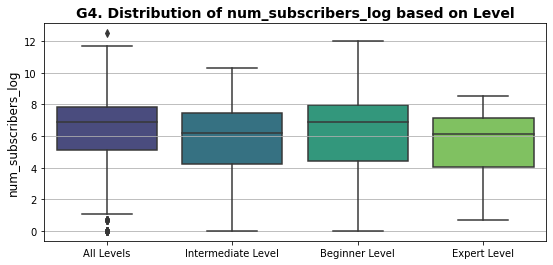

In [25]:
plt.figure(figsize=(9,4))
plt.grid()
ax = sns.boxplot(x='level', y='num_subscribers_log', data=feature_num, palette='viridis')
ax.set_xlabel('', fontsize=12)
ax.set_ylabel('num_subscribers_log', fontsize=12)
ax.set_title('G4. Distribution of num_subscribers_log based on Level', fontsize=14, weight='bold')
plt.show()

In [26]:
a = df1.num_subscribers.value_counts().head(10)
tab_eda1 = pd.DataFrame(a)

In [27]:
tab_eda1['Num_Sub'] = tab_eda1.index
index = np.arange(1,11)
tab_eda1['index'] = index
tab_eda1.rename(columns={"num_subscribers":"Jumlah Data"}, inplace=True)

In [28]:
newcol = ['Num_Sub','Jumlah Data','index']
tab_eda1 = tab_eda1[newcol]
tab_eda1 = tab_eda1.set_index(index)
tab_eda1.drop(columns='index',inplace=True)
tab_eda1

,Num_Sub,Jumlah Data
1,0,70
2,1,49
3,5,28
4,2,27
5,4,26
6,3,26
7,7,24
8,11,23
9,13,19
10,6,18


- Tabel tab_eda1 di atas merupakan **jumlah 10 data course tertinggi** dari **setiap number subscribers**
- Contoh pembacaan : Ada sejumlah 70 course yang memiliki subscriber 0

##### a2. Num_reviews

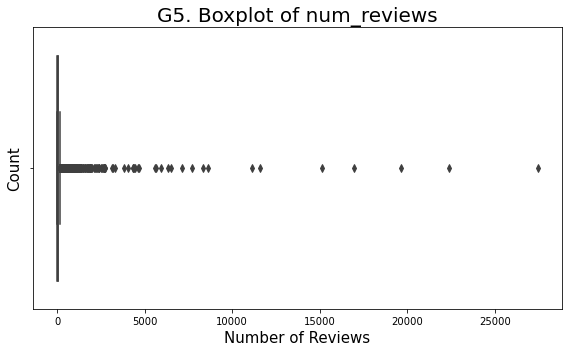

In [29]:
plt.figure(figsize=(8,5))
sns.boxplot(df1.num_reviews)
plt.title('G5. Boxplot of num_reviews', fontsize=20)
plt.ylabel('Count', fontsize=15)
plt.xlabel('Number of Reviews', fontsize=15)  
plt.tick_params(labelsize=10) # ukuran xticks & yticks
plt.tight_layout()
# plt.savefig('b_review.png')
plt.show()

In [30]:
uf_review = (1.5*(df1.num_reviews.quantile(0.75)-df1.num_reviews.quantile(0.25))) + df1.num_reviews.quantile(0.75)
df1.num_reviews[df1.num_reviews>uf_review].count()

494

- Berdasarkna grafik G3. terdapat **494 Outlier** dalam data jumlah reviews. Outlier tidak akan didrop, karena persentasenya pun hanya 494/3678.
- upper fence jumlah review adalah 161.5

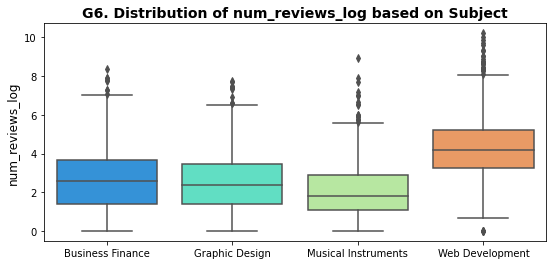

In [31]:
plt.figure(figsize=(9,4))
ax = sns.boxplot(x='subject', y='num_reviews_log', data=feature_num, palette='rainbow')
ax.set_xlabel('', fontsize=12)
ax.set_ylabel('num_reviews_log', fontsize=12)
ax.set_title('G6. Distribution of num_reviews_log based on Subject', fontsize=14, weight='bold')
plt.show()

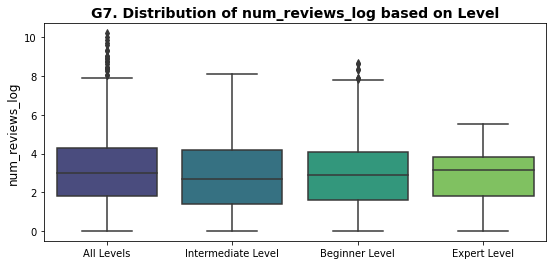

In [32]:
plt.figure(figsize=(9,4))
ax = sns.boxplot(x='level', y='num_reviews_log', data=feature_num, palette='viridis')
ax.set_xlabel('', fontsize=12)
ax.set_ylabel('num_reviews_log', fontsize=12)
ax.set_title('G7. Distribution of num_reviews_log based on Level', fontsize=14, weight='bold')
plt.show()

##### a3. Num_lectures

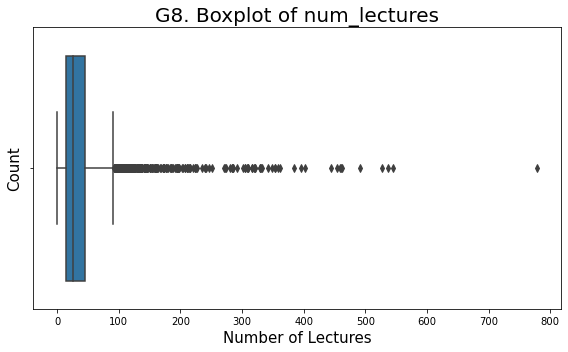

In [33]:
plt.figure(figsize=(8,5))
sns.boxplot(df1.num_lectures)
plt.title('G8. Boxplot of num_lectures', fontsize=20)
plt.ylabel('Count', fontsize=15)
plt.xlabel('Number of Lectures', fontsize=15)  
plt.tick_params(labelsize=10) # ukuran xticks & yticks
plt.tight_layout()
# plt.savefig('b_review.png')
plt.show()

In [34]:
uf_lecture = (1.5*(df1.num_lectures.quantile(0.75)-df1.num_lectures.quantile(0.25))) + df1.num_lectures.quantile(0.75)
df1.num_lectures[df1.num_lectures>uf_lecture].count()

293

- Berdasarkan grafik G4, terdapat **293 Outlier** dalam data jumlah lectures. Outlier tidak perlu didrop
- Upper Fence jumlah lectures adalah 91.875

##### a4. price

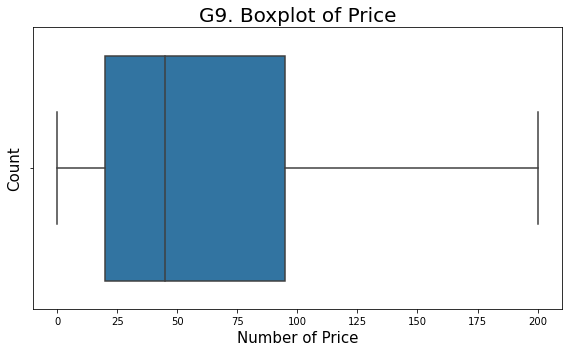

In [35]:
plt.figure(figsize=(8,5))
sns.boxplot(df1.price)
plt.title('G9. Boxplot of Price', fontsize=20)
plt.ylabel('Count', fontsize=15)
plt.xlabel('Number of Price', fontsize=15)  
plt.tick_params(labelsize=10) # ukuran xticks & yticks
plt.tight_layout()
# plt.savefig('b_review.png')
plt.show()

In [36]:
uf_price = (1.5*(df1.price.quantile(0.75)-df1.price.quantile(0.25))) + df1.price.quantile(0.75)
df1.price[df1.price>uf_price].count()

0

- Berdasarkan grafik G5, **Tidak terdapat Outlier** dalam data price
- Upper Fence price adalah 207.5

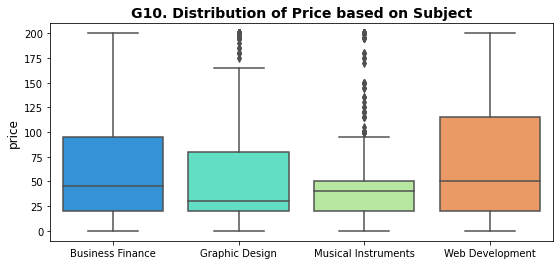

In [37]:
plt.figure(figsize=(9,4))
ax = sns.boxplot(x='subject', y='price', data=feature_num, palette='rainbow')
ax.set_xlabel('', fontsize=12)
ax.set_ylabel('price', fontsize=12)
ax.set_title('G10. Distribution of Price based on Subject', fontsize=14, weight='bold')
plt.show()

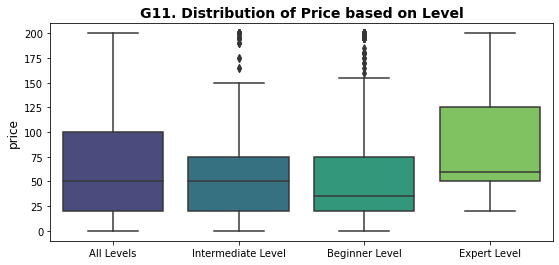

In [38]:
plt.figure(figsize=(9,4))
ax = sns.boxplot(x='level', y='price', data=feature_num, palette='viridis')
ax.set_xlabel('', fontsize=12)
ax.set_ylabel('price', fontsize=12)
ax.set_title('G11. Distribution of Price based on Level', fontsize=14, weight='bold')
plt.show()

##### a5. Content Duration

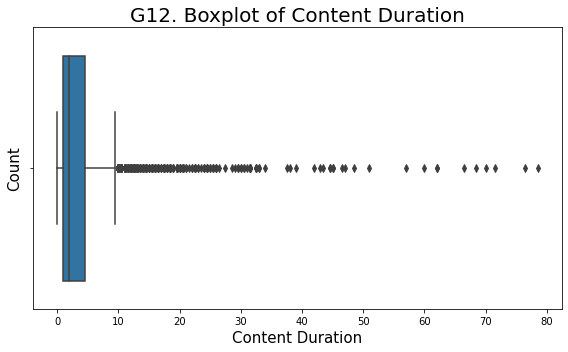

In [39]:
plt.figure(figsize=(8,5))
sns.boxplot(df1.content_duration)
plt.title('G12. Boxplot of Content Duration', fontsize=20)
plt.ylabel('Count', fontsize=15)
plt.xlabel('Content Duration', fontsize=15)  
plt.tick_params(labelsize=10) # ukuran xticks & yticks
plt.tight_layout()
# plt.savefig('b_review.png')
plt.show()

In [40]:
uf_duration = (1.5*(df1.content_duration.quantile(0.75)-df1.content_duration.quantile(0.25))) + df1.content_duration.quantile(0.75)
df1.content_duration[df1.content_duration>uf_duration].count()

313

- Berdasarkan grafik G6, **Terdapat 313 Outlier** dalam data content duration
- Upper Fence content duration adalah 9.75

## b. Analisa 2 variabel

##### b1. Subscribers vs Review

In [41]:
tab_eda2 = df1[['num_reviews','num_subscribers']][(df1.num_subscribers>0) & (df1.num_reviews>0)].sort_values(by='num_reviews')
tab_eda2.head()

,num_reviews,num_subscribers
1050,1,7
1326,1,2
1323,1,8
1319,1,3
250,1,12


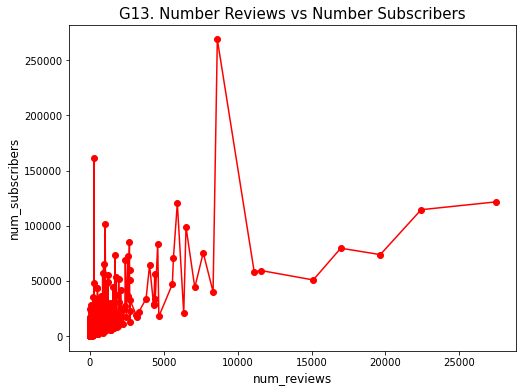

In [42]:
plt.figure(figsize=(8,6))
plt.plot(tab_eda2.num_reviews,tab_eda2.num_subscribers,'ro-')
plt.title('G13. Number Reviews vs Number Subscribers', fontsize=15)
plt.xlabel('num_reviews', fontsize=12)
plt.ylabel('num_subscribers', fontsize=12)
plt.show()

- Secara umum memang berdasarkan grafik G7, **semakin banyak reviewers, subscriber semakin besar.** Dan kenaikan jumlah subscribers mulai stabil saat num_reviews >11rb

##### b2. Subscribers vs is_paid

In [43]:
tab_eda3 = pd.crosstab(index=df1.is_paid, columns='Jumlah', values=df1.num_subscribers, aggfunc='sum').sort_values(by='Jumlah', ascending=False)
tab_eda3

col_0,Jumlah
is_paid,
True,8183595
False,3575525


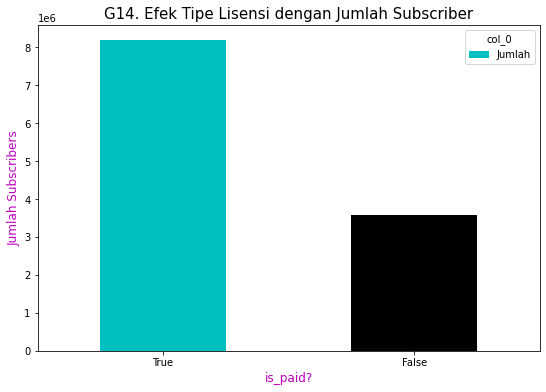

In [44]:
(pd.crosstab(index=df1.is_paid, columns='Jumlah', values=df1.num_subscribers, aggfunc='sum').sort_values(by='Jumlah', ascending=False)).plot(
    figsize=(9,6), 
    kind='bar',
    color = 'ck'
)
plt.title('G14. Efek Tipe Lisensi dengan Jumlah Subscriber', fontsize=15)
plt.ylabel('Jumlah Subscribers', color ='m', fontsize=12)
plt.xlabel('is_paid?', color='m', fontsize=12)  
plt.tick_params(labelsize=10)
plt.xticks(rotation=360)
plt.show()

- **Tipe konten berbayar lebih banyak mendapatkan jumlah subscriber nya dibandingkan yang tidak berbayar**. Akan tetapi, disini lisensi berbayar ini memiliki price yang beraneka ragam. Oleh karena itu perlu dilihat lebih lanjut lagi apakah harga memiliki pengaruh juga terhadap Jumlah subscribers nya 

##### b3. Subscribers Vs Price

In [45]:
tab_eda4 = pd.crosstab(index=df1.price, columns='Total Subscribers', values=df1.num_subscribers, aggfunc='sum').sort_values(by='Total Subscribers', ascending=True)
tab_eda4.tail()

col_0,Total Subscribers
price,
50,717383
195,939254
20,1320658
200,1336331
0,3575525


- Berdasarkan tab_eda4 di atas, Jumlah price 0 (lisensi gratis) memang memperoleh subscribers terbanyak, sedangkan varian berbayar dengan beraneka ragam price, maksimal hanya mendappatkan jumlah subscribers 1,3 jutaan. 

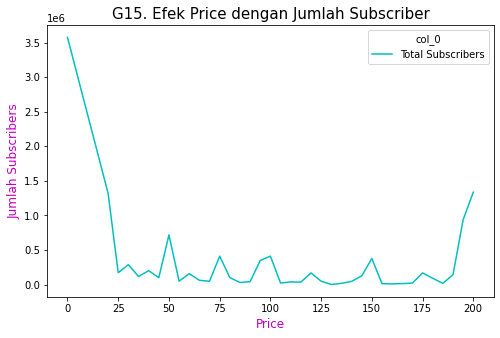

In [46]:
(pd.crosstab(index=df1.price, columns='Total Subscribers', values=df1.num_subscribers, aggfunc='sum')).plot(
    figsize=(8,5), 
    kind='line',
    color = 'c'
)
plt.title('G15. Efek Price dengan Jumlah Subscriber', fontsize=15)
plt.ylabel('Jumlah Subscribers', color ='m', fontsize=12)
plt.xlabel('Price', color='m', fontsize=12)  
plt.tick_params(labelsize=10)
plt.xticks(rotation=360)
plt.show()

- Berdasarkan grafik G9, memang terjadi penurunan saat course menjadi lisensi berbayar, ini merupakan hal yang wajar, karena dalam lisensi berbayar tsb di pecah dalam beberapa variasi harga. Akan tetapi berdasarkan data crosstab sebelumnya jelas menyatakan bahwa jumlah subscriber dari konten berbayar jauh lebih banyak di bandingkan yang gratis **jika hanya dikelompokan menjadi 2 kategori (Gratis dan Berbayar). Jumlah harga memang tidak terlalu berpengaruh terhadap jumlah subscribers, namun ada beberapa titik yang dapat mencapai jumlah maksimal subscribernya. Artinya, ketika membuat konten dengan lisensi berbayar, harus diperhatikan lebih lanjut mengenai range harga yang tepat agar tetep bisa mendapatkan jumlah subscriber maksimal**

- Disini saya coba membuat 3 kategori price, untuk melihat range harga berapa yang dapat mencapai subscribers maksimal

In [47]:
tab_eda5 = df1[['num_subscribers', 'price','subject','level']][df1.price>0]

- Tanyakan pada mas khumaeni lebih baik 0 dimasukan murah atau 0 tidak usah dibawa

In [48]:
tab_eda5['price_bin'] = pd.qcut(tab_eda5.price, 3, labels=['Murah', 'Terjangkau' ,'Mahal'])
tab_eda5.head(10)

,num_subscribers,price,subject,level,price_bin
0,2147,200,Business Finance,All Levels,Mahal
1,2792,75,Business Finance,All Levels,Terjangkau
2,2174,45,Business Finance,Intermediate Level,Terjangkau
3,2451,95,Business Finance,All Levels,Mahal
4,1276,200,Business Finance,Intermediate Level,Mahal
5,9221,150,Business Finance,All Levels,Mahal
6,1540,65,Business Finance,Beginner Level,Terjangkau
7,2917,95,Business Finance,All Levels,Mahal
8,5172,195,Business Finance,Expert Level,Mahal
9,827,200,Business Finance,All Levels,Mahal


- Binning digunakan dengan menggunakan qcut agar dapat membagi secara merata jumlah data berdasarkan nilai quantile nya. Sehingga penarikan kesimpulan akan lebih akurat

In [49]:
tab_eda6 = pd.crosstab(index='Jumlah Data', columns=tab_eda5.price_bin, values=tab_eda5.num_subscribers, aggfunc='count')
tab_eda6

price_bin,Murah,Terjangkau,Mahal
row_0,,,
Jumlah Data,1150,1131,1087


In [50]:
tab_eda61 = pd.crosstab(index='Jumlah Subscribers', columns=tab_eda5.price_bin, values=tab_eda5.num_subscribers, aggfunc='sum')
tab_eda61

price_bin,Murah,Terjangkau,Mahal
row_0,,,
Jumlah Subscribers,1778233,1855861,4549501


In [51]:
out = pd.qcut(tab_eda5.price,3)
out.unique()

[(75.0, 200.0], (30.0, 75.0], (19.999, 30.0]]
Categories (3, interval[float64]): [(19.999, 30.0] < (30.0, 75.0] < (75.0, 200.0]]

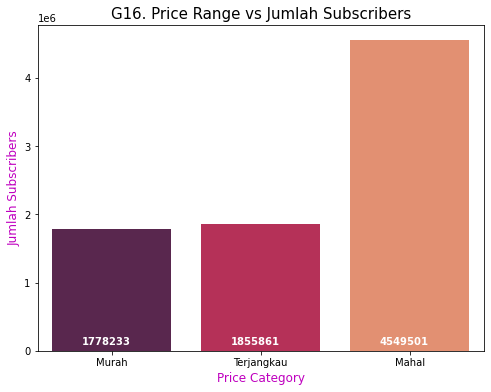

In [52]:
plt.figure(figsize=(8,6))
sns.barplot(x=tab_eda61.columns, y=tab_eda61.iloc[0], palette='rocket')
plt.xlabel('Price Category', c='m', fontsize=12)
plt.ylabel('Jumlah Subscribers', c='m', fontsize=12)
for i in range(0,3):
    plt.text(i-0.2, 100000, tab_eda61.iloc[0][i], fontweight='bold', color='white')
plt.title('G16. Price Range vs Jumlah Subscribers', fontsize=15)
plt.show()

- Berdasarkan hasil binning, ternyata **range Kategori harga Mahal (75-200 USD)** yang mendapatkan jumlah subscribers **maksimal**

In [53]:
tab_eda7 = tab_eda5[tab_eda5.price_bin=='Mahal']
tab_eda71 = pd.crosstab(index='Jumlah Subscriber', columns=tab_eda7.level, values=tab_eda7.num_subscribers, aggfunc='sum')
tab_eda71

level,All Levels,Beginner Level,Expert Level,Intermediate Level
row_0,,,,
Jumlah Subscriber,3123740,1158367,30434,236960


- Berdasarkan grafik G10 dan tab_eda71, untuk memaksimalkan jumlah subcribers pada range harga mahal ialah dengan menerapkan All Levels pada course nya

In [54]:
tab_eda72 = pd.crosstab(index='Jumlah Subscriber', columns=tab_eda7.subject, values=tab_eda7.num_subscribers, aggfunc='sum')
tab_eda72

subject,Business Finance,Graphic Design,Musical Instruments,Web Development
row_0,,,,
Jumlah Subscriber,634781,387982,243389,3283349


- Berdasarkan grafik G10 dan tab_eda72, untuk memaksimalkan jumlah subcribers pada range harga mahal ialah dengan subject Web Development

- Sehingga berdasarkan analisa pada harga ini, Jumlah subscriber dapat diperoleh maksimal pada range harga **Mahal (75-200)**, dengan subject **Web Development**, dan level **All Level**

##### b4. Subscribers vs Content Duration

In [55]:
tab_eda9 = df1[['num_subscribers', 'num_reviews','num_lectures', 'content_duration', 'level', 'subject', 'price']][(df1.content_duration>0)].sort_values(by='content_duration')

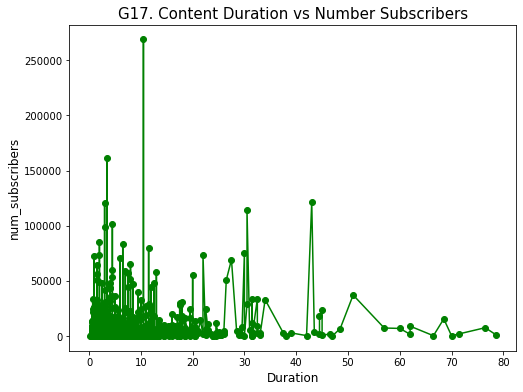

In [56]:
plt.figure(figsize=(8,6))
plt.plot(tab_eda9.content_duration,tab_eda9.num_subscribers, 'go-')
plt.title('G17. Content Duration vs Number Subscribers', fontsize=15)
plt.xlabel('Duration', fontsize=12)
plt.ylabel('num_subscribers', fontsize=12)
plt.show()

- Berdasarkan grafik G11, content_duration **tidak berpengaruh** terhadap jumlah subscribers

- Namun disini saya akan coba kelompokkan content duration dan melihat pada range berapa durasi konten dapat memperoleh jumlah subscribers yang maksimal

In [57]:
tab_eda9.content_duration.unique()

array([ 0.13,  0.32,  0.45,  0.47,  0.48,  0.5 ,  0.52,  0.53,  0.55,
        0.57,  0.58,  0.6 ,  0.62,  0.63,  0.65,  0.67,  0.68,  0.7 ,
        0.72,  0.73,  1.  ,  1.5 ,  2.  ,  2.5 ,  3.  ,  3.5 ,  4.  ,
        4.5 ,  5.  ,  5.5 ,  6.  ,  6.5 ,  7.  ,  7.5 ,  8.  ,  8.5 ,
        9.  ,  9.5 , 10.  , 10.5 , 11.  , 11.5 , 12.  , 12.5 , 13.  ,
       13.5 , 14.  , 14.5 , 15.  , 15.5 , 16.  , 16.5 , 17.  , 17.5 ,
       18.  , 18.5 , 19.  , 19.5 , 20.  , 20.5 , 21.  , 21.5 , 22.  ,
       22.5 , 23.  , 23.5 , 24.  , 24.5 , 25.  , 25.5 , 26.  , 26.5 ,
       27.5 , 28.5 , 29.  , 29.5 , 30.  , 30.5 , 31.  , 31.5 , 32.5 ,
       33.  , 34.  , 37.5 , 38.  , 39.  , 42.  , 43.  , 43.5 , 44.5 ,
       45.  , 46.5 , 47.  , 48.5 , 51.  , 57.  , 60.  , 62.  , 66.5 ,
       68.5 , 70.  , 71.5 , 76.5 , 78.5 ])

In [58]:
tab_eda9['duration_bin'] = pd.cut(tab_eda9['content_duration'], bins=[0, tab_eda9.content_duration.quantile(0.25), tab_eda9.content_duration.quantile(0.5), tab_eda9.content_duration.quantile(0.75), df['content_duration'].max()], labels=['Singkat', 'Cukup', 'Lama', 'Sangat Lama'])
tab_eda9.head(2)

,num_subscribers,num_reviews,num_lectures,content_duration,level,subject,price,duration_bin
116,307,8,5,0.13,All Levels,Business Finance,25,Singkat
448,605,19,4,0.32,All Levels,Business Finance,20,Singkat


In [59]:
tab_eda91 = pd.crosstab(index='Jumlah Data', columns=tab_eda9.duration_bin, values=tab_eda9.num_subscribers, aggfunc='count')
tab_eda91

duration_bin,Singkat,Cukup,Lama,Sangat Lama
row_0,,,,
Jumlah Data,933,926,957,861


In [60]:
tab_eda92 = pd.crosstab(index='Jumlah Subscriber', columns=tab_eda9.duration_bin, values=tab_eda9.num_subscribers, aggfunc='sum')
tab_eda92

duration_bin,Singkat,Cukup,Lama,Sangat Lama
row_0,,,,
Jumlah Subscriber,1797668,2558127,3028817,4374508


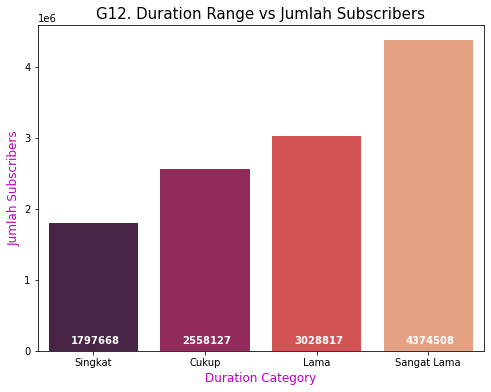

In [61]:
plt.figure(figsize=(8,6))
sns.barplot(x=tab_eda92.columns, y=tab_eda92.iloc[0], palette='rocket')
plt.xlabel('Duration Category', c='m', fontsize=12)
plt.ylabel('Jumlah Subscribers', c='m', fontsize=12)
for i in range(0,4):
    plt.text(i-0.2, 100000, tab_eda92.iloc[0][i], fontweight='bold', color='white')
plt.title('G12. Duration Range vs Jumlah Subscribers', fontsize=15)
plt.show()

- **Semakin lama content duration, jumlah subscribers semakin banyak**. Dan memperoleh jumlah subscribers maksimal pada durasi dg kategori sangat lama (4.5 - 78.5)

##### b5. Subscribers vs lecture

In [62]:
tab_eda10 = df1[['num_subscribers', 'num_lectures', 'subject']][(df1.content_duration>0)].sort_values(by='num_lectures')

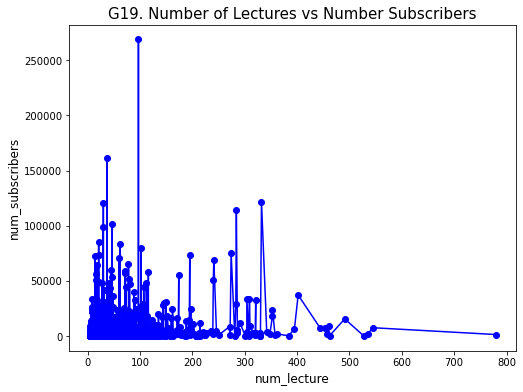

In [63]:
plt.figure(figsize=(8,6))
plt.plot(tab_eda10.num_lectures,tab_eda9.num_subscribers,'bo-')
plt.title('G19. Number of Lectures vs Number Subscribers', fontsize=15)
plt.xlabel('num_lecture', fontsize=12)
plt.ylabel('num_subscribers', fontsize=12)
plt.show()

- Berdasarkan grafik G13, num_lecture **tidak begitu berpengaruh** terhadap jumlah subscribers

##### b6. Subscribers vs Subject

In [64]:
tab_eda11 = df1[['num_subscribers', 'subject']][(df1.content_duration>0)]
tab_eda11a = pd.crosstab(index=tab_eda11.subject, columns='Jumlah Subscriber', values=tab_eda11.num_subscribers, aggfunc='sum').sort_values(by='Jumlah Subscriber', ascending=False)
tab_eda11a

col_0,Jumlah Subscriber
subject,
Web Development,7980572
Business Finance,1868711
Graphic Design,1063148
Musical Instruments,846689


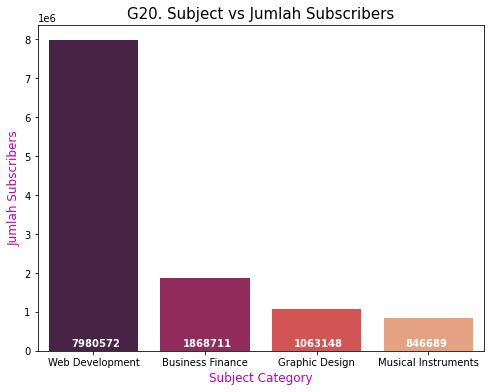

In [65]:
plt.figure(figsize=(8,6))
sns.barplot(x=tab_eda11a.index, y=tab_eda11a['Jumlah Subscriber'].iloc[:], palette='rocket')
plt.xlabel('Subject Category', c='m', fontsize=12)
plt.ylabel('Jumlah Subscribers', c='m', fontsize=12)
for i in range(0,4):
    plt.text(i-0.2, 100000, tab_eda11a['Jumlah Subscriber'].iloc[i], fontweight='bold', color='white')
plt.title('G20. Subject vs Jumlah Subscribers', fontsize=15)
plt.show()

- Subject **Web Development** ialah subject yang paling banyak diminati para subscriber untuk dibeli

##### b7. Subscribers vs Level

In [66]:
tab_eda12 = df1[['num_subscribers', 'level']][(df1.content_duration>0)]
tab_eda12a = pd.crosstab(index=tab_eda12.level, columns='Jumlah Subscriber', values=tab_eda12.num_subscribers, aggfunc='sum').sort_values(by='Jumlah Subscriber', ascending=False)

In [67]:
pd.crosstab(index='Jumlah Subscriber', columns=tab_eda12.level, values=tab_eda12.num_subscribers, aggfunc='count')

level,All Levels,Beginner Level,Expert Level,Intermediate Level
row_0,,,,
Jumlah Subscriber,1928,1270,58,421


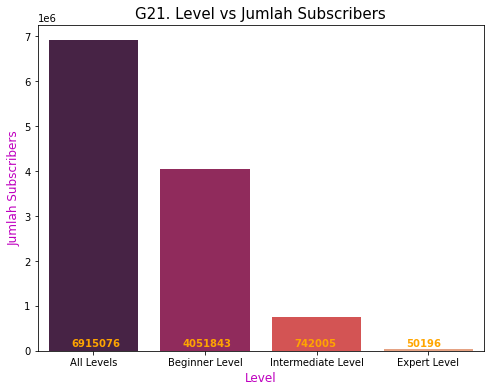

In [68]:
plt.figure(figsize=(8,6))
sns.barplot(x=tab_eda12a.index, y=tab_eda12a['Jumlah Subscriber'].iloc[:], palette='rocket')
plt.xlabel('Level', c='m', fontsize=12)
plt.ylabel('Jumlah Subscribers', c='m', fontsize=12)
for i in range(0,4):
    plt.text(i-0.2, 100000, tab_eda12a['Jumlah Subscriber'][i], fontweight='bold', color='orange')
plt.title('G21. Level vs Jumlah Subscribers', fontsize=15)
plt.show()

- Level course yang dapat mencapai subscriber maksimal secara keseluruhan ialah pada All Level

##### b8. Reviews vs Content_duration

In [69]:
tab_eda13 = tab_eda9.copy()
tab_eda13.head()

,num_subscribers,num_reviews,num_lectures,content_duration,level,subject,price,duration_bin
116,307,8,5,0.13,All Levels,Business Finance,25,Singkat
448,605,19,4,0.32,All Levels,Business Finance,20,Singkat
984,327,1,12,0.45,Beginner Level,Business Finance,20,Singkat
718,23,7,6,0.47,All Levels,Business Finance,20,Singkat
1937,1582,11,6,0.48,All Levels,Musical Instruments,20,Singkat


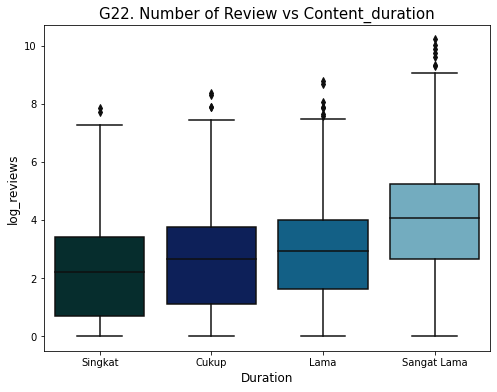

In [70]:
plt.figure(figsize=(8,6))
tab_eda13['log_reviews'] = np.log(tab_eda13.num_reviews)
sns.boxplot(x='duration_bin', y='log_reviews', data=tab_eda13, palette='ocean')
plt.title('G22. Number of Review vs Content_duration', fontsize=15)
plt.xlabel('Duration', fontsize=12)
plt.ylabel('log_reviews', fontsize=12)
plt.show()

In [71]:
tab_eda131 = pd.crosstab(index=tab_eda13.duration_bin, columns='Jumlah Review', values=tab_eda13.num_reviews, aggfunc='sum').sort_values(by='Jumlah Review', ascending=True)

In [72]:
tab_eda131

col_0,Jumlah Review
duration_bin,
Singkat,50621
Cukup,63225
Lama,90332
Sangat Lama,370543


- Semakin lama durasi konten, maka jumlah reviews akan semakin banyak. Dan dapat mencapai num_reviews terbanyak pada durasi 'Sangat Lama'.

In [73]:
tab_eda131 = tab_eda13[tab_eda13.duration_bin=='Sangat Lama']

In [74]:
uf_reviews = (1.5*(tab_eda131.log_reviews.quantile(0.75)-tab_eda131.log_reviews.quantile(0.25))) + tab_eda131.log_reviews.quantile(0.75)
uf_reviews

9.132518912651985

In [75]:
np.exp(uf_reviews)

9251.295850606655

In [76]:
tab_eda131.num_reviews[(tab_eda131.num_reviews>=np.exp(tab_eda131.log_reviews.quantile(0.25)))&(tab_eda131.num_reviews<=np.exp(tab_eda131.log_reviews.quantile(0.75)))].count()

439

In [77]:
tab_eda131.content_duration[(tab_eda131.num_reviews>np.exp(tab_eda131.log_reviews.quantile(0.75)))&(tab_eda131.num_reviews<=np.exp(uf_reviews))].count()

207

- Persebaran data di range Q3-upper fence pada boxplot grafik G16 dengan durasi waktu sangat lama lebih banyak di bandingkan data pada Q1-Q3. Hal ini menunjukkan bahwa jumlah reviews dapat dimaksimalkan dengan menggunakan durasi konten Sangat Lama pada range waktu Q3-Upper Fence

##### b9. Reviews vs num_lectures

<Figure size 576x432 with 0 Axes>

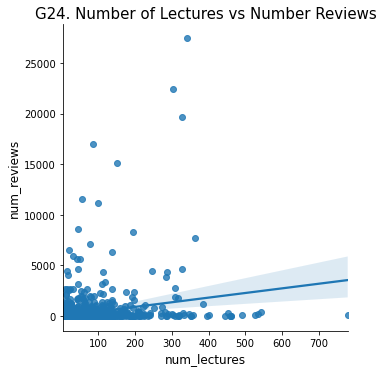

In [78]:
tab_eda14 = df1[['num_lectures','num_reviews']][(df1.num_subscribers>0) & (df1.num_reviews>0)].sort_values(by='num_lectures')
plt.figure(figsize=(8,6))
sns.lmplot(x='num_lectures',y='num_reviews', data=tab_eda14, palette='rainbow')
plt.title('G24. Number of Lectures vs Number Reviews', fontsize=15)
plt.xlabel('num_lectures', fontsize=12)
plt.ylabel('num_reviews', fontsize=12)
plt.show()

- Scatter untuk lihat korelasi, bisa pake line juga.

##### b10. Content_duration vs num_lectures

In [79]:
tab_eda15 = tab_eda9[['num_lectures', 'content_duration', 'duration_bin','price']].sort_values(by='content_duration')

<Figure size 576x432 with 0 Axes>

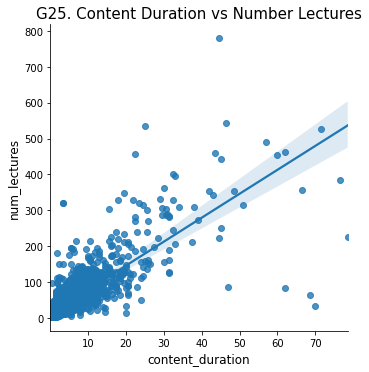

In [80]:
plt.figure(figsize=(8,6))
sns.lmplot(x='content_duration', y='num_lectures', data=tab_eda15, palette='ocean')
plt.title('G25. Content Duration vs Number Lectures', fontsize=15)
plt.xlabel('content_duration', fontsize=12)
plt.ylabel('num_lectures', fontsize=12)
plt.show()

In [81]:
df1[df1.num_lectures==0]

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
892,627332,Mutual Funds for Investors in Retirement Accounts,https://www.udemy.com/mutual-funds-for-investors-in-retirement-accounts/,True,20,0,0,0,All Levels,0.0,2015-12-17 05:38:38+00:00,Business Finance


- ini aneh si, ada jenis course yang content duration nya 0? 

![Ini image](https://i.ibb.co/PwRKT8s/IMG-course-0-duration.png)

- Ternyata sudah ditarik lagi kayanya, soalnya tidak menerima lagi pendaftaran

In [82]:
publish_dt = df1['published_timestamp'].dt

In [83]:
df2 = df1.copy()

In [84]:
df1.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-banking-course/,True,200,2147,23,51,All Levels,1.5,2017-01-18 20:58:58+00:00,Business Finance
1,1113822,Complete GST Course & Certification - Grow Your CA Practice,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09 16:34:20+00:00,Business Finance
2,1006314,Financial Modeling for Business Analysts and Consultants,https://www.udemy.com/financial-modeling-for-business-analysts-and-consultants/,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19 19:26:30+00:00,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel 2017,https://www.udemy.com/complete-excel-finance-course-from-beginner-to-pro/,True,95,2451,11,36,All Levels,3.0,2017-05-30 20:07:24+00:00,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-profits-trading-options/,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13 14:57:18+00:00,Business Finance


In [85]:
df2['year_p'] = publish_dt.year
df2['month_p'] = publish_dt.month
df2['date_p'] = publish_dt.day
df2['yearmonth'] = publish_dt.to_period('M')

In [86]:
df2.drop(columns=['published_timestamp'], inplace=True)

In [87]:
df2.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,subject,year_p,month_p,date_p,yearmonth
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-banking-course/,True,200,2147,23,51,All Levels,1.5,Business Finance,2017,1,18,2017-01
1,1113822,Complete GST Course & Certification - Grow Your CA Practice,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,Business Finance,2017,3,9,2017-03
2,1006314,Financial Modeling for Business Analysts and Consultants,https://www.udemy.com/financial-modeling-for-business-analysts-and-consultants/,True,45,2174,74,51,Intermediate Level,2.5,Business Finance,2016,12,19,2016-12
3,1210588,Beginner to Pro - Financial Analysis in Excel 2017,https://www.udemy.com/complete-excel-finance-course-from-beginner-to-pro/,True,95,2451,11,36,All Levels,3.0,Business Finance,2017,5,30,2017-05
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-profits-trading-options/,True,200,1276,45,26,Intermediate Level,2.0,Business Finance,2016,12,13,2016-12


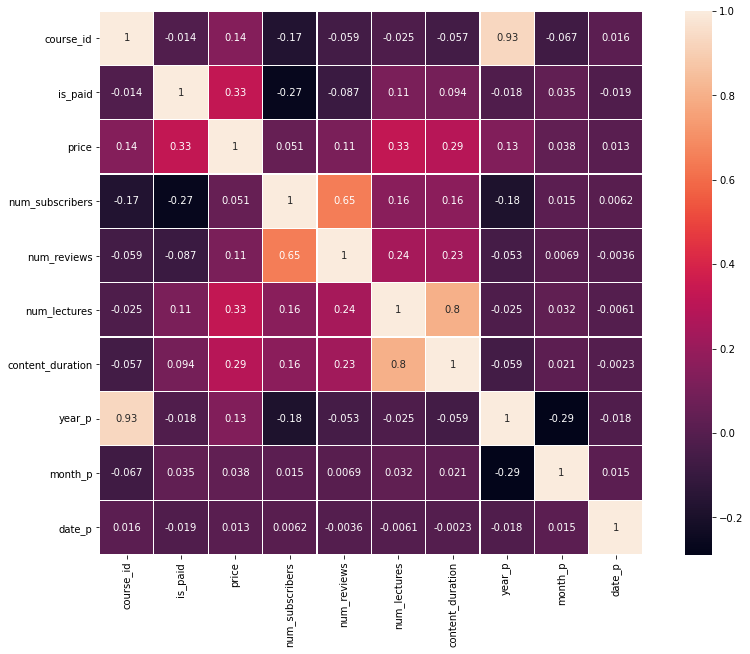

In [88]:
plt.figure(figsize=(15, 10))

sns.heatmap(df2.corr(), annot=True, square=True, linewidths=0.25)
plt.show()

# Feature Engineering & Feature Selection

In [89]:
pd.qcut(df1.num_reviews,2).value_counts()

(-0.001, 18.0]     1868
(18.0, 27445.0]    1810
Name: num_reviews, dtype: int64

In [90]:
def success(x):
    if x <= 1500:
        return 0
    elif x > 1500:
        return 1

In [91]:
df_b = df1[(df1.content_duration>0) & (df1.num_lectures>0)]
df_b.drop([1473,1100,2561,787,894,788], axis=0, inplace=True)
df_b.set_index('course_id',inplace=True)
df_b.drop(columns=['url', 'course_title','published_timestamp'], inplace=True)
df_b['is_success'] = df_b['num_subscribers'].apply(success)
df_b.head()

,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,subject,is_success
course_id,,,,,,,,,
1070968,True,200,2147,23,51,All Levels,1.5,Business Finance,1
1113822,True,75,2792,923,274,All Levels,39.0,Business Finance,1
1006314,True,45,2174,74,51,Intermediate Level,2.5,Business Finance,1
1210588,True,95,2451,11,36,All Levels,3.0,Business Finance,1
1011058,True,200,1276,45,26,Intermediate Level,2.0,Business Finance,0


In [92]:
# dfix = df1[(df1.content_duration>0) & (df1.num_lectures>0)]
# dfix.drop([1473,1100,2561,787,894,788], axis=0, inplace=True)
# dfix.set_index('course_id',inplace=True)
# dfix.drop(columns=['url', 'course_title','published_timestamp'], inplace=True)
# dfix['durasi'] = pd.cut(dfix['content_duration'], bins=[0, dfix.content_duration.quantile(0.25), dfix.content_duration.quantile(0.5), dfix.content_duration.quantile(0.75), dfix['content_duration'].max()], labels=['Singkat', 'Cukup', 'Lama', 'Sangat Lama'])
# dfix['k_harga'] = pd.qcut(dfix.price, 3, labels=['Murah', 'Terjangkau' ,'Mahal'])
# dfix['is_success'] = dfix.num_subscribers.apply(success)
# dfix.tail()

In [93]:
dfix = df1[(df1.content_duration>0) & (df1.num_lectures>0)]
dfix.drop([1473,1100,2561,787,894,788], axis=0, inplace=True)
dfix.set_index('course_id',inplace=True)
dfix.drop(columns=['url', 'course_title','published_timestamp','num_lectures','content_duration'], inplace=True)
dfix['is_success'] = dfix['num_subscribers'].apply(success)
dfix.tail()

,is_paid,price,num_subscribers,num_reviews,level,subject,is_success
course_id,,,,,,,
775618,True,100,1040,14,All Levels,Web Development,0
1088178,True,25,306,3,Beginner Level,Web Development,0
635248,True,40,513,169,All Levels,Web Development,0
905096,True,50,300,31,All Levels,Web Development,0
297602,True,45,901,36,Beginner Level,Web Development,0


In [94]:
dfix.is_success.value_counts(normalize=True)

0    0.628167
1    0.371833
Name: is_success, dtype: float64

In [95]:
df_b['level_enc'] = df_b.level.map({
    "All Levels":0,
    "Beginner Level":1,
    "Intermediate Level":2,
    "Expert Level":3,
})
df_b = pd.get_dummies(df_b, columns=['is_paid','subject'], prefix_sep='_')
df_b.head()

,price,num_subscribers,num_reviews,num_lectures,level,content_duration,is_success,level_enc,is_paid_False,is_paid_True,subject_Business Finance,subject_Graphic Design,subject_Musical Instruments,subject_Web Development
course_id,,,,,,,,,,,,,,
1070968,200,2147,23,51,All Levels,1.5,1,0,0,1,1,0,0,0
1113822,75,2792,923,274,All Levels,39.0,1,0,0,1,1,0,0,0
1006314,45,2174,74,51,Intermediate Level,2.5,1,2,0,1,1,0,0,0
1210588,95,2451,11,36,All Levels,3.0,1,0,0,1,1,0,0,0
1011058,200,1276,45,26,Intermediate Level,2.0,0,2,0,1,1,0,0,0


In [96]:
dfix['level_enc'] = dfix.level.map({
    "All Levels":0,
    "Beginner Level":1,
    "Intermediate Level":2,
    "Expert Level":3,
})
dfix = pd.get_dummies(dfix, columns=['is_paid','subject'], prefix_sep='_')
dfix.head()

,price,num_subscribers,num_reviews,level,is_success,level_enc,is_paid_False,is_paid_True,subject_Business Finance,subject_Graphic Design,subject_Musical Instruments,subject_Web Development
course_id,,,,,,,,,,,,
1070968,200,2147,23,All Levels,1,0,0,1,1,0,0,0
1113822,75,2792,923,All Levels,1,0,0,1,1,0,0,0
1006314,45,2174,74,Intermediate Level,1,2,0,1,1,0,0,0
1210588,95,2451,11,All Levels,1,0,0,1,1,0,0,0
1011058,200,1276,45,Intermediate Level,0,2,0,1,1,0,0,0


In [97]:
# dfix['level_enc'] = dfix.level.map({
#     "All Levels":0,
#     "Beginner Level":1,
#     "Intermediate Level":2,
#     "Expert Level":3,
# })
# dfix['durasi_enc'] = dfix.durasi.map({
#     "Singkat":0,
#     "Cukup":1,
#     "Lama":2,
#     "Sangat Lama":3,
# })
# dfix['harga_enc'] = dfix.k_harga.map({
#     "Murah":0,
#     "Terjangkau":1,
#     "Mahal":2
# })
# dfix = pd.get_dummies(dfix, columns=['is_paid','subject'], prefix_sep='_')
# dfix.head()

In [98]:
df_b.drop(columns=['level','num_subscribers'], inplace=True)
df_b.rename(columns={
    "subject_Business Finance":"business_subject",
    "subject_Graphic Design":"graphic_subject",
    "subject_Musical Instruments":"music_subject",
    "subject_Web Development":"webdev_subject"
}, inplace=True)
df_b.head()

,price,num_reviews,num_lectures,content_duration,is_success,level_enc,is_paid_False,is_paid_True,business_subject,graphic_subject,music_subject,webdev_subject
course_id,,,,,,,,,,,,
1070968,200,23,51,1.5,1,0,0,1,1,0,0,0
1113822,75,923,274,39.0,1,0,0,1,1,0,0,0
1006314,45,74,51,2.5,1,2,0,1,1,0,0,0
1210588,95,11,36,3.0,1,0,0,1,1,0,0,0
1011058,200,45,26,2.0,0,2,0,1,1,0,0,0


In [99]:
dfix.drop(columns=['level','price','num_subscribers'], inplace=True)
dfix.rename(columns={
    "subject_Business Finance":"business_subject",
    "subject_Graphic Design":"graphic_subject",
    "subject_Musical Instruments":"music_subject",
    "subject_Web Development":"webdev_subject"
}, inplace=True)
dfix.head()

,num_reviews,is_success,level_enc,is_paid_False,is_paid_True,business_subject,graphic_subject,music_subject,webdev_subject
course_id,,,,,,,,,
1070968,23,1,0,0,1,1,0,0,0
1113822,923,1,0,0,1,1,0,0,0
1006314,74,1,2,0,1,1,0,0,0
1210588,11,1,0,0,1,1,0,0,0
1011058,45,0,2,0,1,1,0,0,0


In [100]:
df_b.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3671 entries, 1070968 to 297602
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             3671 non-null   int64  
 1   num_reviews       3671 non-null   int64  
 2   num_lectures      3671 non-null   int64  
 3   content_duration  3671 non-null   float64
 4   is_success        3671 non-null   int64  
 5   level_enc         3671 non-null   int64  
 6   is_paid_False     3671 non-null   uint8  
 7   is_paid_True      3671 non-null   uint8  
 8   business_subject  3671 non-null   uint8  
 9   graphic_subject   3671 non-null   uint8  
 10  music_subject     3671 non-null   uint8  
 11  webdev_subject    3671 non-null   uint8  
dtypes: float64(1), int64(5), uint8(6)
memory usage: 222.3 KB


In [101]:
# dfix[['durasi_enc','harga_enc']] = dfix[['durasi_enc','harga_enc']].astype('int64')

In [102]:
dfix.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3671 entries, 1070968 to 297602
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   num_reviews       3671 non-null   int64
 1   is_success        3671 non-null   int64
 2   level_enc         3671 non-null   int64
 3   is_paid_False     3671 non-null   uint8
 4   is_paid_True      3671 non-null   uint8
 5   business_subject  3671 non-null   uint8
 6   graphic_subject   3671 non-null   uint8
 7   music_subject     3671 non-null   uint8
 8   webdev_subject    3671 non-null   uint8
dtypes: int64(3), uint8(6)
memory usage: 136.2 KB


# Exporting Clean File

In [103]:
# dfix.to_csv('dfix1.csv')
# df_b.to_csv('df_base1.csv')

# Splitting Data

- **Semua yang berakhiran "b", berarti df_base**
- **Semua yang berakhiran "f", merupakan dfix hasil feature engineering**

In [104]:
Xb = df_b.drop(columns ='is_success')
yb = df_b.is_success

Xf = dfix.drop(columns ='is_success')
yf = dfix.is_success

In [105]:
Xb_train, Xb_test, yb_train, yb_test = train_test_split(Xb, yb, stratify=yb, test_size = .25, random_state=0)
Xf_train, Xf_test, yf_train, yf_test = train_test_split(Xf, yf, stratify=yf, test_size = .25, random_state=0)

In [106]:
Xb_train.shape

(2753, 11)

In [107]:
Xf_train.shape

(2753, 8)

In [108]:
Xf_train.head()

,num_reviews,level_enc,is_paid_False,is_paid_True,business_subject,graphic_subject,music_subject,webdev_subject
course_id,,,,,,,,
629088,368,1,0,1,0,0,0,1
544556,1,0,0,1,1,0,0,0
219838,111,2,0,1,0,0,0,1
883394,14,0,0,1,1,0,0,0
735550,39,0,0,1,1,0,0,0


In [109]:
Xf_train.iloc[0]

num_reviews         368
level_enc           1  
is_paid_False       0  
is_paid_True        1  
business_subject    0  
graphic_subject     0  
music_subject       0  
webdev_subject      1  
Name: 629088, dtype: int64

# Modeling

##### Dalam pembuatan model ini, akan dilimitasi bahwa model hanya digunakan sebagai alat untuk memprediksi/mendeteksi sukses tidak nya suatu course yang akan dibuka. 
##### Hasil prediksi akan berupa persentase kesuksesan / keberhasilan dari course yang akan di-*release* dengan feature-feature yang tersedia

- Dalam penggunaan algoritma untuk membuat model **akan banyak classification report, confusion matrix, serta accuracy score dan roc_auc_score yang dihasilkan**. Oleh karena itu akan dijelaskan terlebih dahulu disini, sehingga ini dapat diterapkan ke setiap pembacaan classification report, confusion matrix, serta accuracy and roc_auc_score

![ini image](https://i.ibb.co/jWc7mtX/Confusion-matrix.png)

### Penjelasan Classification Report
1. recall 0 (recall negatif) => merupakan jumlah prediksi benar di kelas negatif (TN) dibandingkan seluruh jumlah aktual negatif (TN + FP)
2. recall 1 (recall positif) => merupakan jumlah prediksi benar di kelas positif (TP) dibandingkan seluruh jumlah aktual positif (TP + FN)
3. precision 0 (precision negatif) => merupakan jumlah prediksi benar di kelas negatif (TN) dibandingkan seluruh jumlah tebakan negatif (TN + FN)
4. precision 1 (precision positif) => merupakan jumlah prediksi benar di kelas positif (TP) dibandingkan seluruh jumlah tebakan positif (TP + FP)
5. Accuracy => seluruh tebakan benar dibandingkan seluruh seluruh data

- Dikarenakan dataset yang digunakan memiliki target yang balance, maka accuracy dapat juga di pertimbangkan sebagai penentu ketepatan model
- Fokus model ialah untuk memperoleh recall negatif dan akurasi setinggi mungkin, sehingga False Positif dapat dihindari.
- Alasan mengapa False Positif perlu dihindari dikarenakan:
  - Course yang actualnya **SUKSES (1)** ditebak **TIDAK SUKSES(0)** (FN), perusahaan hanya rugi karena kehilangan kesempatan meraup keuntungan.
  - Sedangkan ketika course yang actualnya **TIDAK SUKSES (0)** ditebak **SUKSES(1)**, maka perusahaan akan rugi karena kehilangan cost yang telah banyak dikeluarkan, apalagi jika lecture yang dikontrak banyak, maka mendapat kerugian juga karena sudang menggaji nya. Oleh karena itu kerugian ini lah yang harus dihindari
- Artinya tujuan **pembuatan model akan dicari yang recall 0 dan accuracy nya tinggi**

### Penjelasan Confusion Matrix
1. TP ==> ialah ketika aktual positif ditebak positif
2. FP ==> ialah ketika aktual negatif ditebak positif
3. TN ==> ialah ketika aktual negatif ditebak negatif
4. FN ==> ialah ketika aktual positif ditebak negatif


### Model 1 - Logistic Regeression

### 1. Base

In [110]:
model_b1 = LogisticRegression()
model_b1.fit(Xb_train,yb_train)

LogisticRegression()

In [111]:
yb1_pred = model_b1.predict(Xb_test)
yb1_predt = model_b1.predict(Xb_train)

In [112]:
print(classification_report(yb_test, yb1_pred))

              precision    recall  f1-score   support

           0       0.79      0.91      0.84       577
           1       0.80      0.58      0.67       341

    accuracy                           0.79       918
   macro avg       0.79      0.75      0.76       918
weighted avg       0.79      0.79      0.78       918



In [113]:
print(classification_report(yb_train, yb1_predt))

              precision    recall  f1-score   support

           0       0.80      0.92      0.86      1729
           1       0.81      0.62      0.71      1024

    accuracy                           0.81      2753
   macro avg       0.81      0.77      0.78      2753
weighted avg       0.81      0.81      0.80      2753



In [114]:
cbb1 = confusion_matrix(yb_test, yb1_pred, labels=[1, 0])
cb_b1 = pd.DataFrame(cbb1,
                 columns=['Pred 1', 'Pred 0'],
                 index=['Act 1', 'Act 0'])
cb_b1

,Pred 1,Pred 0
Act 1,199,142
Act 0,51,526


In [115]:
roc_auc_score(yb_test, yb1_pred)

0.7475947488526455

In [116]:
model_b1.predict([Xb_test.iloc[100]])

array([1], dtype=int64)

In [117]:
yb_test.iloc[100]

1

### 2. dfix (with FE)

In [118]:
model_f1 = LogisticRegression()
model_f1.fit(Xf_train,yf_train)

LogisticRegression()

In [119]:
yf1_pred = model_f1.predict(Xf_test)
yf1_predt = model_f1.predict(Xf_train)

In [120]:
print(classification_report(yf_test, yf1_pred))

              precision    recall  f1-score   support

           0       0.79      0.91      0.85       577
           1       0.79      0.59      0.68       341

    accuracy                           0.79       918
   macro avg       0.79      0.75      0.76       918
weighted avg       0.79      0.79      0.78       918



In [121]:
print(classification_report(yf_train, yf1_predt))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85      1729
           1       0.81      0.62      0.70      1024

    accuracy                           0.80      2753
   macro avg       0.80      0.77      0.78      2753
weighted avg       0.80      0.80      0.80      2753



In [162]:
cfb1 = confusion_matrix(yf_test, yf1_pred, labels=[1, 0])
cf_b1 = pd.DataFrame(cfb1,
                 columns=['Pred 1', 'Pred 0'],
                 index=['Act 1', 'Act 0'])
cf_b1

,Pred 1,Pred 0
Act 1,202,139
Act 0,53,524


In [123]:
roc_auc_score(yf_test, yf1_pred)

0.7502604735790848

### Model 2 - XGB Classifier

### 1. Base

In [182]:
model_b2 = XGBClassifier()
model_b2.fit(Xb_train,yb_train)

XGBClassifier()

In [183]:
yb2_pred = model_b2.predict(Xb_test)
yb2_predt = model_b2.predict(Xb_train)

In [184]:
print(classification_report(yb_test, yb2_pred))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       577
           1       0.79      0.70      0.74       341

    accuracy                           0.82       918
   macro avg       0.81      0.79      0.80       918
weighted avg       0.82      0.82      0.82       918



In [185]:
print(classification_report(yb_train, yb2_predt))

              precision    recall  f1-score   support

           0       0.85      0.90      0.88      1729
           1       0.82      0.74      0.78      1024

    accuracy                           0.84      2753
   macro avg       0.84      0.82      0.83      2753
weighted avg       0.84      0.84      0.84      2753



In [186]:
cbb2 = confusion_matrix(yb_test, yb2_pred, labels=[1, 0])
cb_b1 = pd.DataFrame(cbb2,
                 columns=['Pred 1', 'Pred 0'],
                 index=['Act 1', 'Act 0'])
cb_b1

,Pred 1,Pred 0
Act 1,237,104
Act 0,62,515


In [187]:
roc_auc_score(yb_test, yb2_pred)

0.7937811615342784

### 2. dfix (with FE)

In [188]:
model_f2 = XGBClassifier()
model_f2.fit(Xf_train,yf_train)

XGBClassifier()

In [189]:
yf2_pred = model_f2.predict(Xf_test)
yf2_predt = model_f2.predict(Xf_train)

In [190]:
print(classification_report(yf_test, yf2_pred))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85       577
           1       0.77      0.70      0.74       341

    accuracy                           0.81       918
   macro avg       0.80      0.79      0.79       918
weighted avg       0.81      0.81      0.81       918



In [191]:
print(classification_report(yf_train, yf2_predt))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1729
           1       0.79      0.72      0.75      1024

    accuracy                           0.82      2753
   macro avg       0.81      0.80      0.81      2753
weighted avg       0.82      0.82      0.82      2753



In [192]:
cfb2 = confusion_matrix(yf_test, yf2_pred, labels=[1, 0])
cf_b2 = pd.DataFrame(cfb2,
                 columns=['Pred 1', 'Pred 0'],
                 index=['Act 1', 'Act 0'])
cf_b1

,Pred 1,Pred 0
Act 1,202,139
Act 0,53,524


In [193]:
roc_auc_score(yf_test, yf2_pred)

0.7895144772485858

### Model 3 - KNN Classifier

### 1. Base

In [194]:
model_b3 = KNeighborsClassifier()
model_b3.fit(Xb_train,yb_train)

KNeighborsClassifier()

In [195]:
yb3_pred = model_b3.predict(Xb_test)
yb3_predt = model_b3.predict(Xb_train)

In [196]:
print(classification_report(yb_test, yb3_pred))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       577
           1       0.74      0.65      0.69       341

    accuracy                           0.79       918
   macro avg       0.77      0.76      0.76       918
weighted avg       0.78      0.79      0.78       918



In [197]:
print(classification_report(yb_train, yb3_predt))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1729
           1       0.81      0.74      0.78      1024

    accuracy                           0.84      2753
   macro avg       0.83      0.82      0.83      2753
weighted avg       0.84      0.84      0.84      2753



In [198]:
cbb3 = confusion_matrix(yb_test, yb3_pred, labels=[1, 0])
cb_b3 = pd.DataFrame(cbb3,
                 columns=['Pred 1', 'Pred 0'],
                 index=['Act 1', 'Act 0'])
cb_b3

,Pred 1,Pred 0
Act 1,220,121
Act 0,76,501


In [199]:
roc_auc_score(yb_test, yb3_pred)

0.7567227595460391

### 2. dfix (with FE)

In [200]:
model_f3 = KNeighborsClassifier()
model_f3.fit(Xf_train,yf_train)

KNeighborsClassifier()

In [201]:
yf3_pred = model_f3.predict(Xf_test)
yf3_predt = model_f3.predict(Xf_train)

In [202]:
print(classification_report(yf_test, yf3_pred))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83       577
           1       0.71      0.70      0.71       341

    accuracy                           0.78       918
   macro avg       0.77      0.77      0.77       918
weighted avg       0.78      0.78      0.78       918



In [203]:
print(classification_report(yf_train, yf3_predt))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87      1729
           1       0.79      0.76      0.78      1024

    accuracy                           0.84      2753
   macro avg       0.83      0.82      0.82      2753
weighted avg       0.83      0.84      0.83      2753



In [204]:
cfb3 = confusion_matrix(yf_test, yf3_pred, labels=[1, 0])
cf_b3 = pd.DataFrame(cfb3,
                 columns=['Pred 1', 'Pred 0'],
                 index=['Act 1', 'Act 0'])
cf_b3

,Pred 1,Pred 0
Act 1,240,101
Act 0,99,478


In [205]:
roc_auc_score(yf_test, yf3_pred)

0.7661175968326412

# Preprocessing (Polynomial & Scalling)

### A. Polynomial

In [206]:
poly = PolynomialFeatures(3, include_bias=False)

In [207]:
Xb_poly = poly.fit_transform(Xb_train)
Xf_poly = poly.fit_transform(Xf_train)
Xb_testp = poly.fit_transform(Xb_test)
Xf_testp = poly.fit_transform(Xf_test)

### LogPoly

### 1. Base Poly

In [208]:
model_b1.fit(Xb_poly, yb_train)

LogisticRegression()

In [209]:
ybp_pred = model_b1.predict(Xb_testp)
ybp_predt = model_b1.predict(Xb_poly)

In [210]:
print(classification_report(yb_test, ybp_pred))

              precision    recall  f1-score   support

           0       0.78      0.94      0.85       577
           1       0.85      0.54      0.66       341

    accuracy                           0.79       918
   macro avg       0.81      0.74      0.76       918
weighted avg       0.80      0.79      0.78       918



In [211]:
print(classification_report(yb_train, ybp_predt))

              precision    recall  f1-score   support

           0       0.79      0.94      0.86      1729
           1       0.86      0.58      0.69      1024

    accuracy                           0.81      2753
   macro avg       0.82      0.76      0.77      2753
weighted avg       0.81      0.81      0.80      2753



In [212]:
cbblp = confusion_matrix(yb_test, ybp_pred, labels=[1, 0])
cb_blp = pd.DataFrame(cbblp,
                 columns=['Pred 1', 'Pred 0'],
                 index=['Act 1', 'Act 0'])
cb_blp

,Pred 1,Pred 0
Act 1,184,157
Act 0,33,544


### 2. dfix Poly

In [213]:
model_f1.fit(Xf_poly, yf_train)

LogisticRegression()

In [214]:
yfp_pred = model_f1.predict(Xf_testp)
yfp_predt = model_f1.predict(Xf_poly)

In [215]:
print(classification_report(yf_test, yfp_pred))

              precision    recall  f1-score   support

           0       0.87      0.76      0.81       577
           1       0.67      0.81      0.73       341

    accuracy                           0.78       918
   macro avg       0.77      0.79      0.77       918
weighted avg       0.80      0.78      0.78       918



In [216]:
print(classification_report(yf_train, yfp_predt))

              precision    recall  f1-score   support

           0       0.86      0.78      0.82      1729
           1       0.68      0.79      0.73      1024

    accuracy                           0.78      2753
   macro avg       0.77      0.79      0.78      2753
weighted avg       0.80      0.78      0.79      2753



In [217]:
cfblp = confusion_matrix(yf_test, yfp_pred, labels=[1, 0])
cf_blp = pd.DataFrame(cfblp,
                 columns=['Pred 1', 'Pred 0'],
                 index=['Act 1', 'Act 0'])
cf_blp

,Pred 1,Pred 0
Act 1,277,64
Act 0,138,439


### XGB Poly

### 1. Base Poly

In [218]:
model_b2.fit(Xb_poly, yb_train)

XGBClassifier()

In [219]:
ybxp_pred = model_b2.predict(Xb_testp)
ybxp_predt = model_b2.predict(Xb_poly)

In [220]:
print(classification_report(yb_test, ybxp_pred))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       577
           1       0.77      0.68      0.72       341

    accuracy                           0.81       918
   macro avg       0.80      0.78      0.79       918
weighted avg       0.80      0.81      0.80       918



In [221]:
print(classification_report(yb_train, ybxp_predt))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89      1729
           1       0.83      0.77      0.80      1024

    accuracy                           0.86      2753
   macro avg       0.85      0.84      0.84      2753
weighted avg       0.86      0.86      0.86      2753



In [222]:
cbxp = confusion_matrix(yb_test, ybxp_pred, labels=[1, 0])
cb_xp = pd.DataFrame(cbxp,
                 columns=['Pred 1', 'Pred 0'],
                 index=['Act 1', 'Act 0'])
cb_xp

,Pred 1,Pred 0
Act 1,233,108
Act 0,69,508


### 2. dfix Poly

In [223]:
model_f2.fit(Xf_poly, yf_train)

XGBClassifier()

In [224]:
yfxp_pred = model_f2.predict(Xf_testp)
yfxp_predt = model_f2.predict(Xf_poly)

In [225]:
print(classification_report(yf_test, yfxp_pred))

              precision    recall  f1-score   support

           0       0.82      0.87      0.85       577
           1       0.76      0.68      0.72       341

    accuracy                           0.80       918
   macro avg       0.79      0.78      0.78       918
weighted avg       0.80      0.80      0.80       918



In [226]:
print(classification_report(yf_train, yfxp_predt))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1729
           1       0.81      0.72      0.76      1024

    accuracy                           0.83      2753
   macro avg       0.82      0.81      0.82      2753
weighted avg       0.83      0.83      0.83      2753



In [227]:
cfxp = confusion_matrix(yf_test, yfxp_pred, labels=[1, 0])
cf_xp = pd.DataFrame(cfxp,
                 columns=['Pred 1', 'Pred 0'],
                 index=['Act 1', 'Act 0'])
cf_xp

,Pred 1,Pred 0
Act 1,233,108
Act 0,74,503


### KNN Poly

### 1. Base Poly

In [228]:
model_b3.fit(Xb_poly, yb_train)

KNeighborsClassifier()

In [230]:
ybkp_pred = model_b3.predict(Xb_testp)
ybkp_predt = model_b3.predict(Xb_poly)

In [231]:
print(classification_report(yb_test, ybkp_pred))

              precision    recall  f1-score   support

           0       0.79      0.86      0.82       577
           1       0.72      0.62      0.67       341

    accuracy                           0.77       918
   macro avg       0.76      0.74      0.75       918
weighted avg       0.77      0.77      0.77       918



In [232]:
print(classification_report(yb_train, ybkp_predt))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1729
           1       0.81      0.75      0.78      1024

    accuracy                           0.84      2753
   macro avg       0.84      0.82      0.83      2753
weighted avg       0.84      0.84      0.84      2753



In [244]:
cbkp = confusion_matrix(yb_test, ybkp_pred, labels=[1, 0])
cb_kp = pd.DataFrame(cbkp,
                 columns=['Pred 1', 'Pred 0'],
                 index=['Act 1', 'Act 0'])
cb_kp

,Pred 1,Pred 0
Act 1,210,131
Act 0,80,497


### 2. dfix Poly

In [235]:
model_f3.fit(Xf_poly, yf_train)

KNeighborsClassifier()

In [238]:
yfkp_pred = model_f3.predict(Xf_testp)
yfkp_predt = model_f3.predict(Xf_poly)

In [239]:
print(classification_report(yf_test, yfkp_pred))

              precision    recall  f1-score   support

           0       0.79      0.81      0.80       577
           1       0.67      0.65      0.66       341

    accuracy                           0.75       918
   macro avg       0.73      0.73      0.73       918
weighted avg       0.75      0.75      0.75       918



In [240]:
print(classification_report(yf_train, yfkp_predt))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87      1729
           1       0.78      0.77      0.78      1024

    accuracy                           0.84      2753
   macro avg       0.82      0.82      0.82      2753
weighted avg       0.84      0.84      0.84      2753



In [243]:
cfkp = confusion_matrix(yf_test, yfkp_pred, labels=[1, 0])
cf_kp = pd.DataFrame(cfkp,
                 columns=['Pred 1', 'Pred 0'],
                 index=['Act 1', 'Act 0'])
cf_kp

,Pred 1,Pred 0
Act 1,220,121
Act 0,109,468


### B. Scalling

- Dikarenakan dataset terdapat banyak outlier dan target tidak terdistribusi normal, maka digunakan lah "Robust Scaller"

In [144]:
scaler = RobustScaler()

In [145]:
Xb_scaled = scaler.fit_transform(Xb_train)
Xf_scaled = scaler.fit_transform(Xf_train)
Xb_tests = scaler.fit_transform(Xb_test)
Xf_tests = scaler.fit_transform(Xf_test)

### LogisticScaled

### 1. Base Scaled

In [245]:
model_b1.fit(Xb_scaled, yb_train)

LogisticRegression()

In [246]:
ybs_pred = model_b1.predict(Xb_tests)
ybs_predt = model_b1.predict(Xb_scaled)

In [247]:
print(classification_report(yb_test, ybs_pred))

              precision    recall  f1-score   support

           0       0.79      0.91      0.85       577
           1       0.80      0.59      0.68       341

    accuracy                           0.79       918
   macro avg       0.79      0.75      0.76       918
weighted avg       0.79      0.79      0.78       918



In [248]:
print(classification_report(yb_train, ybs_predt))

              precision    recall  f1-score   support

           0       0.81      0.91      0.86      1729
           1       0.81      0.63      0.71      1024

    accuracy                           0.81      2753
   macro avg       0.81      0.77      0.78      2753
weighted avg       0.81      0.81      0.80      2753



In [249]:
cbls = confusion_matrix(yb_test, ybs_pred, labels=[1, 0])
cb_ls = pd.DataFrame(cbls,
                 columns=['Pred 1', 'Pred 0'],
                 index=['Act 1', 'Act 0'])
cb_ls

,Pred 1,Pred 0
Act 1,200,141
Act 0,51,526


### 2. dfix Scaled

In [150]:
model_f1.fit(Xf_scaled, yf_train)

LogisticRegression()

In [151]:
yfs_pred = model_f1.predict(Xf_tests)
yfs_predt = model_f1.predict(Xf_scaled)

In [152]:
print(classification_report(yf_test, yfs_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       577
           1       0.79      0.60      0.68       341

    accuracy                           0.79       918
   macro avg       0.79      0.75      0.76       918
weighted avg       0.79      0.79      0.78       918



In [153]:
print(classification_report(yf_train, yfs_predt))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85      1729
           1       0.81      0.62      0.70      1024

    accuracy                           0.80      2753
   macro avg       0.80      0.77      0.78      2753
weighted avg       0.80      0.80      0.80      2753



In [250]:
cfls = confusion_matrix(yf_test, yfs_pred, labels=[1, 0])
cf_ls = pd.DataFrame(cfls,
                 columns=['Pred 1', 'Pred 0'],
                 index=['Act 1', 'Act 0'])
cf_ls

,Pred 1,Pred 0
Act 1,204,137
Act 0,55,522


# Hyperparameter Tunning

### XGBClassifier

### 1. Base hyper

In [ ]:
modelxgh = XGBClassifier()
paramxg = {
    'max_depth':np.arange(1,10),
    'learning_rate': np.arange(0,1.5,0.1),
    'n_estimators':np.random.randint(100,200,10),
}

In [ ]:
modelXRS = RandomizedSearchCV(
    estimator = modelxgh, 
    param_distributions = paramxg, cv = 3)

modelXGS = GridSearchCV(modelxgh, paramxg, cv=3, n_jobs=-1, verbose=1)

In [ ]:
modelXRS.fit(Xb_train,yb_train)

In [ ]:
modelXGS.fit(Xb_train,yb_train)

In [ ]:
modelXRS.best_params_

In [ ]:
modelXGS.best_params_

In [ ]:
ybxh_predRS = modelXRS.predict(Xb_test)
ybxh_predGS = modelXGS.predict(Xb_test)
ybxh_predRSt = modelXRS.predict(Xb_train)
ybxh_predGSt = modelXGS.predict(Xb_train)

In [152]:
print(classification_report(yb_test, ybxh_predRS))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       577
           1       0.79      0.60      0.68       341

    accuracy                           0.79       918
   macro avg       0.79      0.75      0.76       918
weighted avg       0.79      0.79      0.78       918



In [153]:
print(classification_report(yb_test, ybxh_predGS))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85      1729
           1       0.81      0.62      0.70      1024

    accuracy                           0.80      2753
   macro avg       0.80      0.77      0.78      2753
weighted avg       0.80      0.80      0.80      2753



In [250]:
cbxhRS = confusion_matrix(yb_test, ybxh_predRS, labels=[1, 0])
cb_xhRS = pd.DataFrame(cbxhRS,
                 columns=['Pred 1', 'Pred 0'],
                 index=['Act 1', 'Act 0'])
cb_xhRS

,Pred 1,Pred 0
Act 1,204,137
Act 0,55,522


In [ ]:
cbxhGS = confusion_matrix(yb_test, ybxh_predGS, labels=[1, 0])
cb_xhGS = pd.DataFrame(cbxhGS,
                 columns=['Pred 1', 'Pred 0'],
                 index=['Act 1', 'Act 0'])
cb_xhGS

### 2. dfix hyper

In [ ]:
modelxgh = XGBClassifier()
paramxg = {
    'max_depth':np.arange(1,10),
    'learning_rate': np.arange(0,1.5,0.1),
    'n_estimators':np.random.randint(100,200,10),
}

In [ ]:
modelXRS = RandomizedSearchCV(
    estimator = modelxgh, 
    param_distributions = paramxg, cv = 3)

modelXGS = GridSearchCV(modelxgh, paramxg, cv=3, n_jobs=-1, verbose=1)

In [ ]:
modelXRS.fit(Xf_train,yf_train)

In [ ]:
modelXGS.fit(Xf_train,yf_train)

In [ ]:
modelXRS.best_params_

In [ ]:
modelXGS.best_params_

In [ ]:
yfxh_predRS = modelXRS.predict(Xf_test)
yfxh_predGS = modelXGS.predict(Xf_test)
yfxh_predRSt = modelXRS.predict(Xf_train)
yfxh_predGSt = modelXGS.predict(Xf_train)

In [152]:
print(classification_report(yf_test, yfxh_predRS))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       577
           1       0.79      0.60      0.68       341

    accuracy                           0.79       918
   macro avg       0.79      0.75      0.76       918
weighted avg       0.79      0.79      0.78       918



In [153]:
print(classification_report(yf_test, yfxh_predGS))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85      1729
           1       0.81      0.62      0.70      1024

    accuracy                           0.80      2753
   macro avg       0.80      0.77      0.78      2753
weighted avg       0.80      0.80      0.80      2753



In [250]:
cfxhRS = confusion_matrix(yf_test, yfxh_predRS, labels=[1, 0])
cf_xhRS = pd.DataFrame(cfxhRS,
                 columns=['Pred 1', 'Pred 0'],
                 index=['Act 1', 'Act 0'])
cf_xhRS

,Pred 1,Pred 0
Act 1,204,137
Act 0,55,522


In [ ]:
cfxhGS = confusion_matrix(yf_test, yfxh_predGS, labels=[1, 0])
cf_xhGS = pd.DataFrame(cfxhGS,
                 columns=['Pred 1', 'Pred 0'],
                 index=['Act 1', 'Act 0'])
cf_xhGS

### KNN Classifier

### 1. Base hyper

In [ ]:
modelkfh = KNeighborsClassifier()
paramkf = {
    'n_neighbors'=np.arange(5,15),
    'weights'=['uniform','distance']
}

In [ ]:
modelKRS = RandomizedSearchCV(estimator = modelkfh, param_distributions = paramkf, cv = 3)

modelKGS = GridSearchCV(modelkfh, paramkf, cv=3, n_jobs=-1, verbose=1)

In [ ]:
modelKRS.fit(Xb_train,yb_train)

In [ ]:
modelKGS.fit(Xb_train,yb_train)

In [ ]:
modelKRS.best_params_

In [ ]:
modelKGS.best_params_

In [ ]:
ybkh_predRS = modelKRS.predict(Xb_test)
ybkh_predGS = modelKGS.predict(Xb_test)
ybkh_predRSt = modelKRS.predict(Xb_train)
ybkh_predGSt = modelKGS.predict(Xb_train)

In [152]:
print(classification_report(yb_test, ybkh_predRS))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       577
           1       0.79      0.60      0.68       341

    accuracy                           0.79       918
   macro avg       0.79      0.75      0.76       918
weighted avg       0.79      0.79      0.78       918



In [153]:
print(classification_report(yb_test, ybkh_predGS))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85      1729
           1       0.81      0.62      0.70      1024

    accuracy                           0.80      2753
   macro avg       0.80      0.77      0.78      2753
weighted avg       0.80      0.80      0.80      2753



In [250]:
cbkhRS = confusion_matrix(yb_test, ybkh_predRS, labels=[1, 0])
cb_khRS = pd.DataFrame(cbkhRS,
                 columns=['Pred 1', 'Pred 0'],
                 index=['Act 1', 'Act 0'])
cb_khRS

,Pred 1,Pred 0
Act 1,204,137
Act 0,55,522


In [ ]:
cbkhGS = confusion_matrix(yb_test, ybkh_predGS, labels=[1, 0])
cb_khGS = pd.DataFrame(cbkhGS,
                 columns=['Pred 1', 'Pred 0'],
                 index=['Act 1', 'Act 0'])
cb_khGS

### 2. dfix hyper

In [ ]:
modelkfh = KNeighborsClassifier()
paramkf = {
    'n_neighbors'=np.arange(5,15),
    'weights'=['uniform','distance']
}

In [ ]:
modelKRS = RandomizedSearchCV(estimator = modelkfh, param_distributions = paramkf, cv = 3)

modelKGS = GridSearchCV(modelkfh, paramkf, cv=3, n_jobs=-1, verbose=1)

In [ ]:
modelKRS.fit(Xf_train,yf_train)

In [ ]:
modelKGS.fit(Xf_train,yf_train)

In [ ]:
modelKRS.best_params_

In [ ]:
modelKGS.best_params_

In [ ]:
yfkh_predRS = modelKRS.predict(Xf_test)
yfkh_predGS = modelKGS.predict(Xf_test)
yfkh_predRSt = modelKRS.predict(Xf_train)
yfkh_predGSt = modelKGS.predict(Xf_train)

# Model Selection

# Kesimpulan Sementara
- Model ini dapat digunakan untuk melihat/mengklasifikasikan/menentukan index kepuasan kerja karyawan dengan roc_auc juga score ketelitian sebesar 81% dengan recall 0 yaitu 0.94 menggunakan algoritma Logistic Regression dengan Polynomial
- Variabel kuat yang menentukan dalam penentuan sukses tidaknya suatu course ialah, Jumlah Review, Subject Course, Tipe Lisensi (Gratis/Berbayar), dan Level course